In [1]:
import pandas as pd

df1 = pd.read_csv("../clean_data_test/clean_hoanghamobile.csv")
df2 = pd.read_csv("../clean_data_test/clean_phongvu.csv")
#Kiểm tra các cột chung
common_cols = df1.columns.intersection(df2.columns)
print("Các cột chung:", list(common_cols))

# Lọc hai DataFrame chỉ giữ lại các cột chung
df1_common = df1[common_cols]
df2_common = df2[common_cols]

# Gộp hai DataFrame lại với nhau theo chiều dòng
df = pd.concat([df1_common, df2_common], ignore_index=True)


# Xóa các ký tự không phải số và chuyển đổi sang kiểu float
df['Giá Bán'] = df['Giá Bán'].replace({r'[^\d]': ''}, regex=True).astype(float)

Các cột chung: ['RAM', 'Bộ Nhớ', 'Dung Lượng Pin', 'Hệ Điều Hành', 'Giá Bán', 'Hãng CPU', 'Tên Sản Phẩm', 'Số Lõi', 'Xung nhịp tối đa', 'Cache', 'Loại Màn Hình', 'Độ Phân Giải', 'Hãng GPU', 'Độ Dày', 'Trọng Lượng', 'Số Cổng Giao Tiếp', 'Hãng Sản Xuất']


In [2]:
import pandas as pd
import re

def normalize_text(text):
    """Hàm chuẩn hóa văn bản: xóa ký tự đặc biệt, viết thường."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # loại bỏ ký tự đặc biệt
    text = re.sub(r'\s+', ' ', text).strip()  # loại bỏ khoảng trắng dư
    return text

def extract_os_name(os_string):
    """Hàm phân loại hệ điều hành thành 5 nhóm."""
    if pd.isna(os_string):
        return None

    os_string = normalize_text(os_string)

    # Nhóm "No OS", FreeDOS, không cài sẵn,...
    if any(keyword in os_string for keyword in ['no os', 'noos', 'no os', 'free os', 'freedos', 'free operating system']):
        return 'No OS'

    # Nhóm MacOS
    if any(keyword in os_string for keyword in ['mac', 'macos', 'os x', 'big sur']):
        return 'MacOS'

    # Nhóm Ubuntu hoặc Linux
    if any(keyword in os_string for keyword in ['ubuntu', 'linux']):
        return 'Ubuntu'

    # Nhóm Windows 11
    if any(keyword in os_string for keyword in ['windows 11', 'win11', 'win 11', 'win11sl', 'win 11 home', 'windows 11 home']):
        return 'Win 11'

    # Nhóm Windows 10
    if any(keyword in os_string for keyword in ['windows 10', 'win10', 'win 10', 'windows 10 home', 'windows 10 pro']):
        return 'Win 10'

    return None

# Áp dụng hàm chuẩn hóa
df['Hệ Điều Hành'] = df['Hệ Điều Hành'].apply(extract_os_name)
print(df['Hệ Điều Hành'].unique())

['Win 11' 'Win 10' None 'MacOS' 'No OS' 'Ubuntu']


In [3]:
missing_count = df['Hệ Điều Hành'].isna().sum()
print(f"Số giá trị thiếu trong cột 'Hệ Điều Hành': {missing_count}")

Số giá trị thiếu trong cột 'Hệ Điều Hành': 19


In [4]:
import pandas as pd
import numpy as np
# Mapping tên hãng sang loại màn hình mặc định
screen_type_mapping = {
    'LAPTOP LENOVO': 'IPS',
    'LAPTOP HP': 'TN',
    'LAPTOP ASUS': 'OLED',
    'LAPTOP DELL': 'IPS',
    'LAPTOP ACER': 'IPS',
    'LAPTOP MSI': 'IPS',
    'LAPTOP MACBOOK': 'RETINA',
}

# Hàm ánh xạ
def map_screen_type(row):
    screen = row.get('Loại Màn Hình', '')
    if pd.notna(screen) and str(screen).strip():  # Nếu đã có giá trị hợp lệ
        return str(screen).strip()
    
    name = str(row.get('Tên Sản Phẩm', '')).upper().strip()
    key = ' '.join(name.split()[:2])  # Lấy 2 từ đầu tiên (ví dụ: "LAPTOP ASUS")
    return screen_type_mapping.get(key, None)  # Trả về rỗng nếu không khớp

# Gán lại giá trị cho cột "Loại Màn Hình"
df['Loại Màn Hình'] = df.apply(map_screen_type, axis=1)

# Thay các chuỗi rỗng '' bằng NaN
df['Loại Màn Hình'] = df['Loại Màn Hình'].replace('', np.nan)

# In ra các giá trị duy nhất (đã loại bỏ NaN)
print(df['Loại Màn Hình'].fillna('').unique())


['IPS' 'WVA' 'LED' 'TN' 'RETINA' '' 'OLED' 'LED/IPS']


In [5]:
missing_count = df['Loại Màn Hình'].isna().sum()
print(f"Số giá trị thiếu trong cột: {missing_count}")

Số giá trị thiếu trong cột: 13


In [6]:
#Chuyển tất cả dữ liệu thành chữ thường
def convert_all_to_lowercase(df):
    """
    Chuyển tất cả các giá trị dạng chuỗi trong DataFrame thành chữ thường.
    Các cột không phải dạng chuỗi sẽ được giữ nguyên.
    """
    for col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
            df[col] = df[col].astype(str).str.lower()
    return df
df = convert_all_to_lowercase(df)

In [7]:
selected_features = [
    'RAM',
    'Bộ Nhớ',
    'Dung Lượng Pin',
    'Giá Bán',
    'Số Lõi',
    'Xung nhịp tối đa',
    'Cache',
    'Số Cổng Giao Tiếp',
    'Hệ Điều Hành',
    'Hãng CPU',
    'Hãng GPU',
    'Loại Màn Hình',
    'Độ Phân Giải',
    'Độ Dày',
    'Trọng Lượng',
    'Hãng Sản Xuất',
]

df1 = df[selected_features].copy()


In [8]:
# Xuất dữ liệu đã làm sạch -lấp đầy
df.to_csv("../clean_data_test/filled_data.csv", index=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26380\429487673.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x='Số lượng trống', y='Đặc trưng', palette='Reds_d')


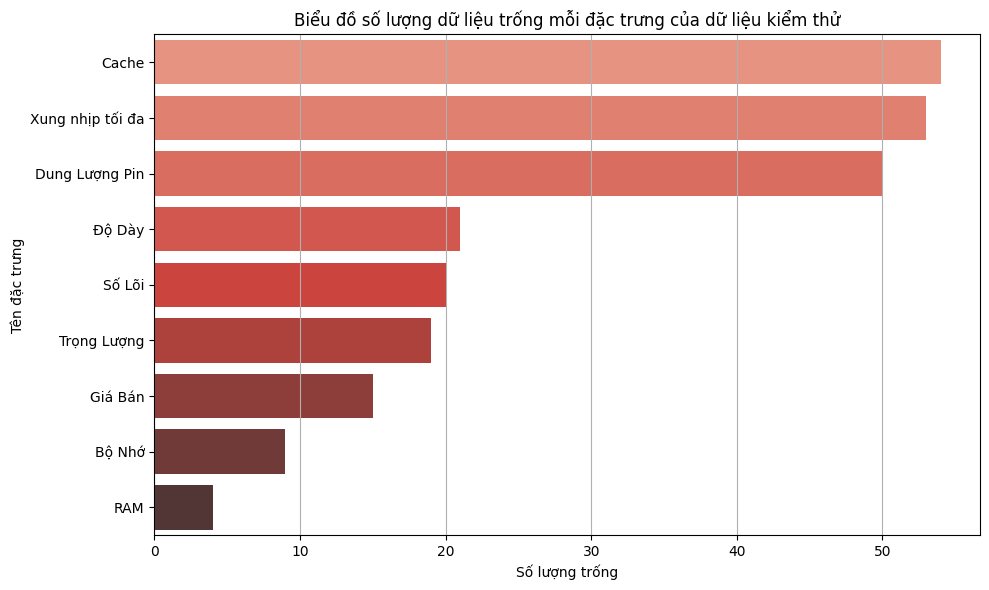

In [9]:
#Biểu diễn số dữ liệu trống mỗi đặc trưng dữ liệu huấn luyện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def thong_ke_trong(df):
    missing_counts = df.isna().sum()
    missing_df = pd.DataFrame({
        'Đặc trưng': missing_counts.index,
        'Số lượng trống': missing_counts.values,
        'Tỷ lệ trống (%)': (missing_counts.values / len(df)) * 100
    })
    missing_df = missing_df[missing_df['Số lượng trống'] > 0]
    missing_df = missing_df.sort_values(by='Số lượng trống', ascending=False).reset_index(drop=True)
    return missing_df

# Thống kê dữ liệu trống
missing_df = thong_ke_trong(df1)

# Trực quan hóa nếu có dữ liệu trống
if not missing_df.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df, x='Số lượng trống', y='Đặc trưng', palette='Reds_d')
    plt.title('Biểu đồ số lượng dữ liệu trống mỗi đặc trưng của dữ liệu kiểm thử')
    plt.xlabel('Số lượng trống')
    plt.ylabel('Tên đặc trưng')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu bị thiếu trong tập dữ liệu.")


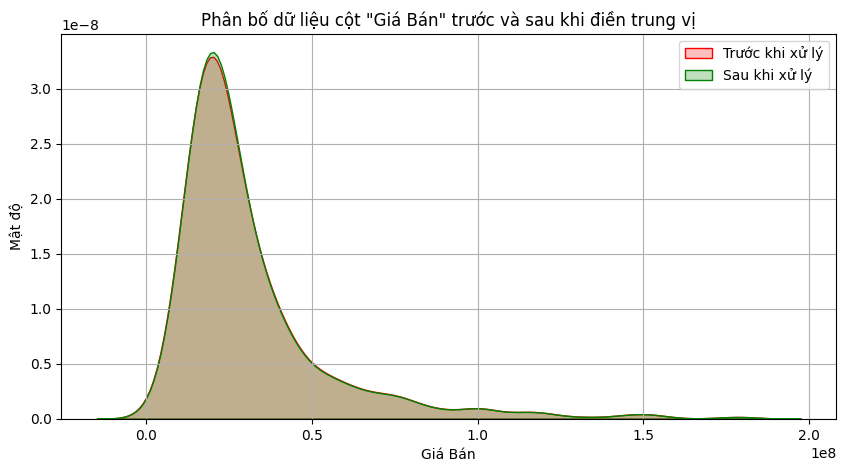

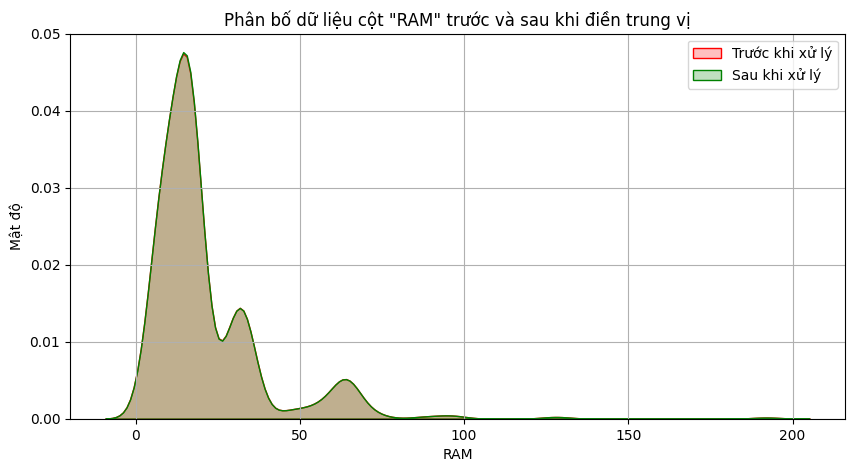

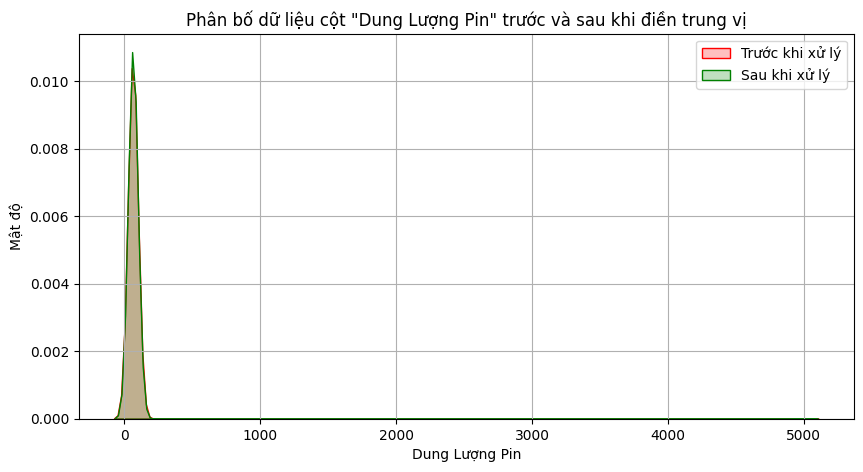

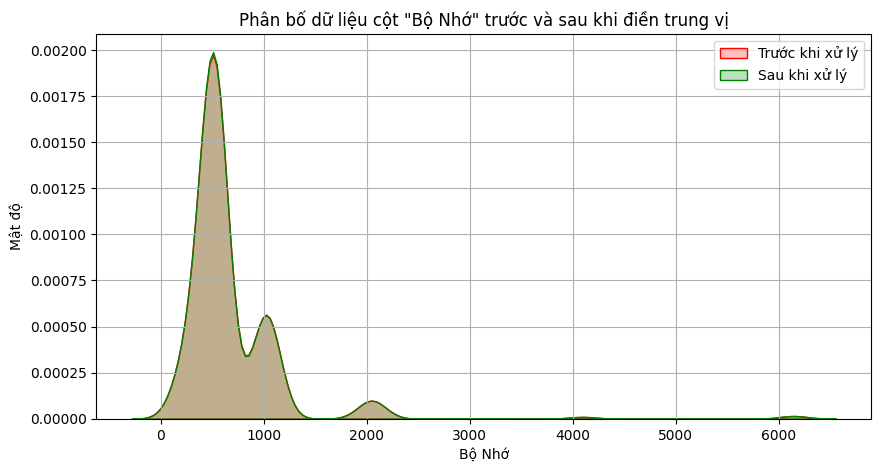

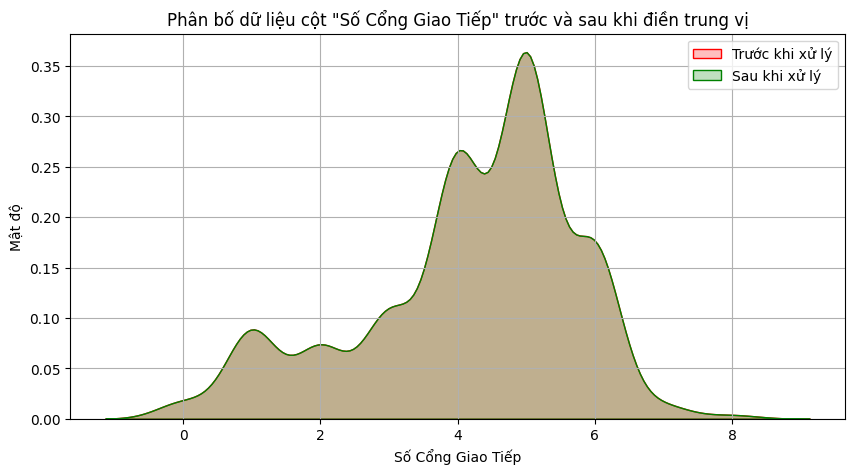

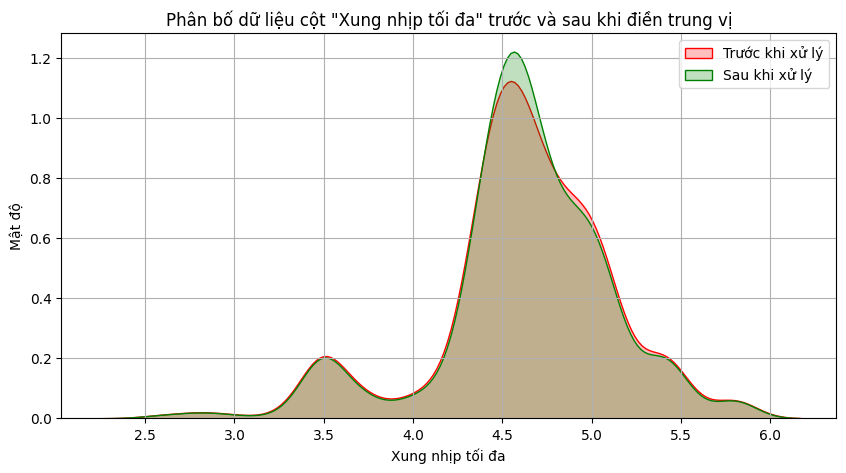

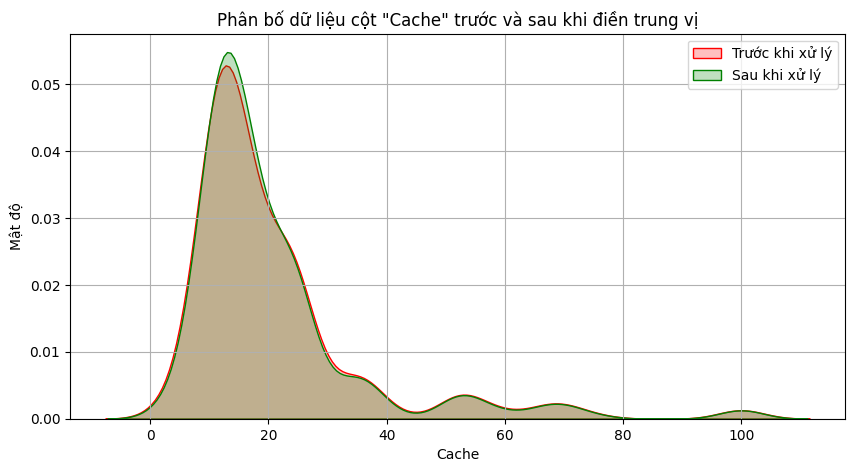

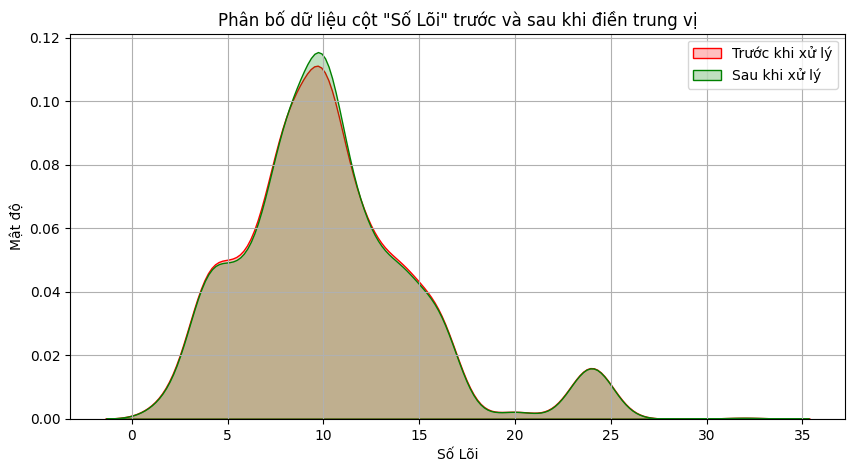

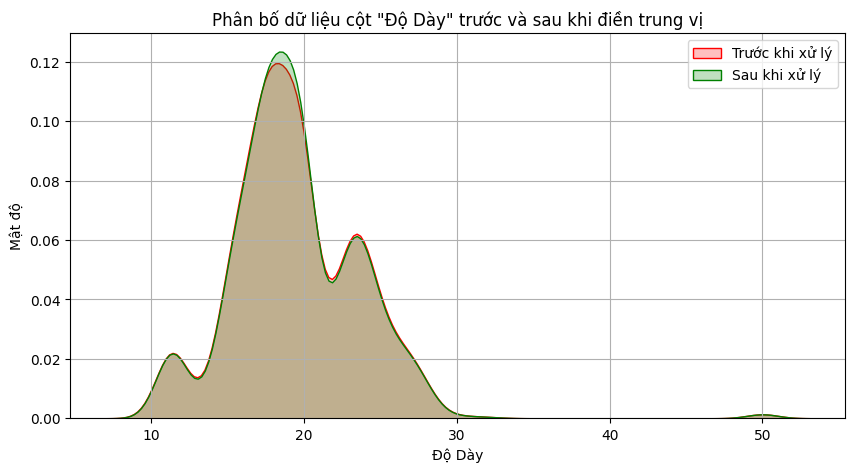

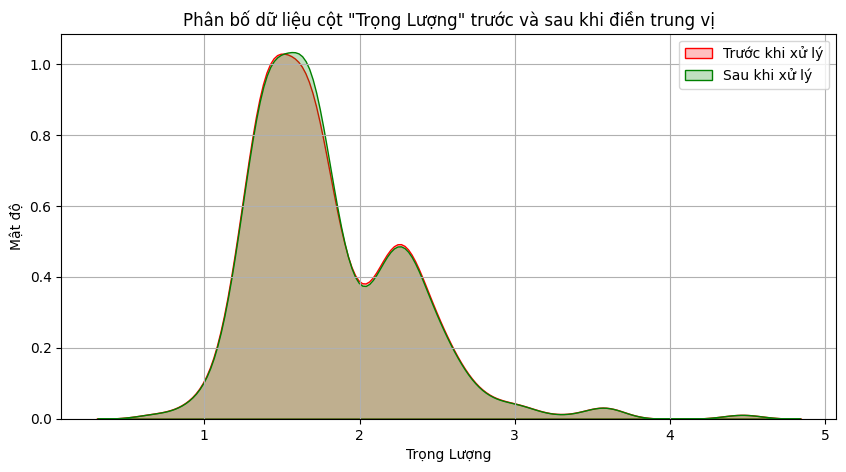

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách cột cần xử lý
numeric_columns = ['Giá Bán', 'RAM', 'Dung Lượng Pin', 'Bộ Nhớ',
                   'Số Cổng Giao Tiếp','Xung nhịp tối đa','Cache','Số Lõi',
                   'Độ Dày','Trọng Lượng']

# Chuyển các cột sang kiểu số (nếu có giá trị không hợp lệ sẽ thành NaN)
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tạo bản sao trước khi xử lý để so sánh
df_before = df[numeric_columns].copy()

# Điền giá trị thiếu bằng trung vị
for col in numeric_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Tạo bản sau khi xử lý
df_after = df[numeric_columns]

# Trực quan hóa: Biểu đồ phân phối trước và sau xử lý
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    # Kiểm tra nếu cột còn NaN hoặc không đủ dữ liệu thì bỏ qua
    if df_before[col].dropna().shape[0] < 2:
        continue
    sns.kdeplot(df_before[col].dropna(), label='Trước khi xử lý', color='red', fill=True)
    sns.kdeplot(df_after[col], label='Sau khi xử lý', color='green', fill=True)
    plt.title(f'Phân bố dữ liệu cột "{col}" trước và sau khi điền trung vị')
    plt.xlabel(col)
    plt.ylabel('Mật độ')
    plt.legend()
    plt.grid(True)
    plt.show()


In [11]:
# Lấp giá trị thiếu với giá trị phổ biến nhất cho các cột phân loại
categorical_columns = ['Hệ Điều Hành', 'Loại Màn Hình','Hãng CPU',  'Hãng GPU','Độ Phân Giải','Hãng Sản Xuất']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26380\1631985623.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
def classify_usage(row):
    ram = pd.to_numeric(row['RAM'], errors='coerce')
    ssd = pd.to_numeric(row['Bộ Nhớ'], errors='coerce')
    name = str(row['Tên Sản Phẩm']).lower()
    cpu_brand = str(row['Hãng CPU']).lower()
    gpu_brand = str(row['Hãng GPU']).lower()
    screen_type = str(row['Loại Màn Hình']).lower()
    resolution = str(row['Độ Phân Giải']).lower()
    weight = pd.to_numeric(row['Trọng Lượng'], errors='coerce')
    thickness = pd.to_numeric(row['Độ Dày'], errors='coerce')
    cores = pd.to_numeric(row['Số Lõi'], errors='coerce')
    hz = pd.to_numeric(row.get('Tần Số Quét', 60), errors='coerce')

    # 1. Laptop 2 trong 1 / Cảm ứng
    if any(k in name for k in ['x360', 'flip', 'cảm ứng', 'touch', 'yoga', 'surface']):
        return 'Laptop 2 trong 1 / Cảm ứng'

    # 2. Gaming
    gaming_keywords = ['rog', 'tuf', 'predator', 'gaming', 'legion', 'alienware']
    is_gaming_name = any(k in name for k in gaming_keywords)
    is_heavy = weight is not None and weight > 2.0
    is_high_refresh = hz >= 120
    is_multicore = cores >= 6
    gaming_score = sum([is_gaming_name, is_heavy, is_high_refresh, is_multicore])
    if gaming_score >= 3:
        return 'Gaming'

    # 3. Thiết kế đồ họa / Multimedia
    high_res = '2560' in resolution or '4k' in resolution or 'retina' in screen_type or 'oled' in screen_type
    if ('creator' in name or 'studio' in name or 'pro' in name or high_res):
        return 'Thiết kế đồ họa / Multimedia'

    # 4. Di động / Mỏng nhẹ / Ultrabook
    thin = thickness is not None and thickness < 18
    light = weight is not None and weight < 1.5
    if thin or light or any(k in name for k in ['zenbook', 'air', 'ultrabook', 'gram', 'xps 13']):
        return 'Di động / Mỏng nhẹ / Ultrabook'

    # 5. Kỹ thuật / Lập trình
    is_dev_name = any(k in name for k in ['thinkpad', 'latitude', 'workstation'])
    dev_ram = ram >= 16
    dev_ssd = ssd >= 512 
    dev_cpu = cores >= 8 or any(k in cpu_brand for k in ['m1', 'm2', 'm3', 'i7', 'i9', 'r7', 'r9'])
    if (is_dev_name or dev_cpu) and dev_ram and dev_ssd:
        return 'Kỹ thuật / Lập trình'


    # 6. Mặc định
    return 'Văn phòng / Học tập'

df['Phân Loại'] = df.apply(classify_usage, axis=1)
for category in df['Phân Loại'].unique():
    print(f"{category}: {df[df['Phân Loại'] == category].shape[0]} sản phẩm")


Di động / Mỏng nhẹ / Ultrabook: 373 sản phẩm
Thiết kế đồ họa / Multimedia: 259 sản phẩm
Gaming: 143 sản phẩm
Kỹ thuật / Lập trình: 233 sản phẩm
Văn phòng / Học tập: 121 sản phẩm
Laptop 2 trong 1 / Cảm ứng: 61 sản phẩm


In [13]:
df.drop('Tên Sản Phẩm', axis=1, inplace=True)

In [14]:
# Xuất dữ liệu đã làm sạch -lấp đầy
df.to_csv("../clean_data_test/filled_data.csv", index=False)

In [15]:
#Chuẩn hóa về dạng phân phối chuẩn
from sklearn.preprocessing import StandardScaler

# Danh sách các cột cần chuẩn hóa
numerical_cols = [ 'Giá Bán', 'RAM', 'Dung Lượng Pin', 'Bộ Nhớ',
                   'Số Cổng Giao Tiếp','Xung nhịp tối đa','Cache','Số Lõi',
                   'Độ Dày','Trọng Lượng']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:

# Mã hóa các nhãn danh mục
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Hệ Điều Hành', 'Loại Màn Hình', 'Hãng CPU',  'Hãng GPU','Độ Phân Giải','Hãng Sản Xuất']

# Áp dụng LabelEncoder cho từng cột
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

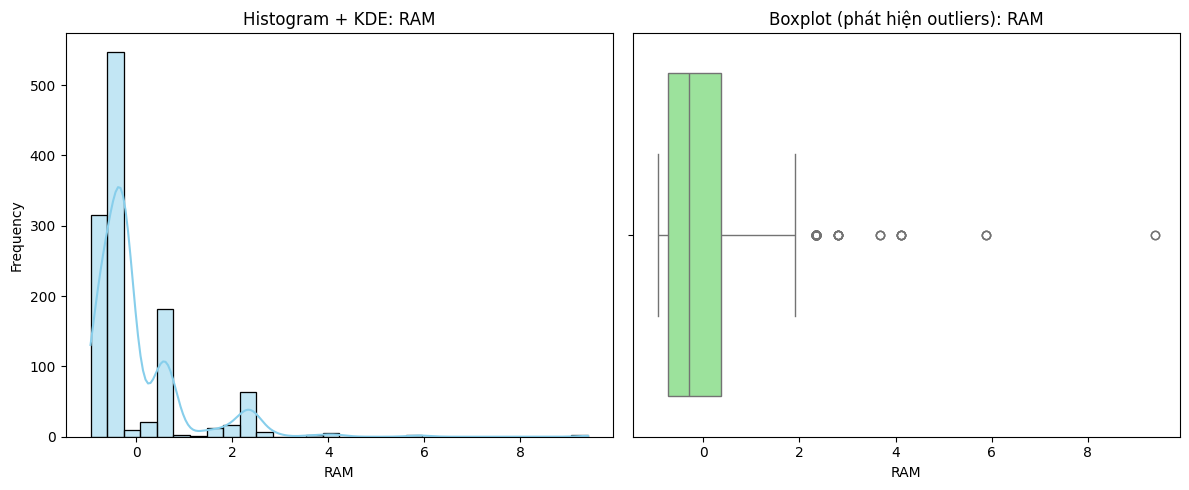

Số điểm nghi ngờ outlier theo Z-score (>3): 13




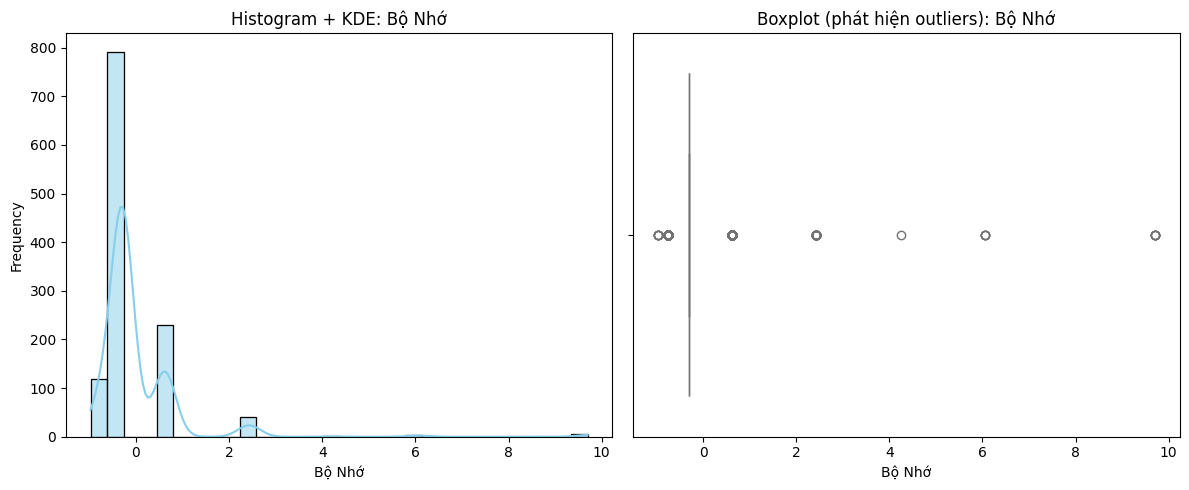

Số điểm nghi ngờ outlier theo Z-score (>3): 11




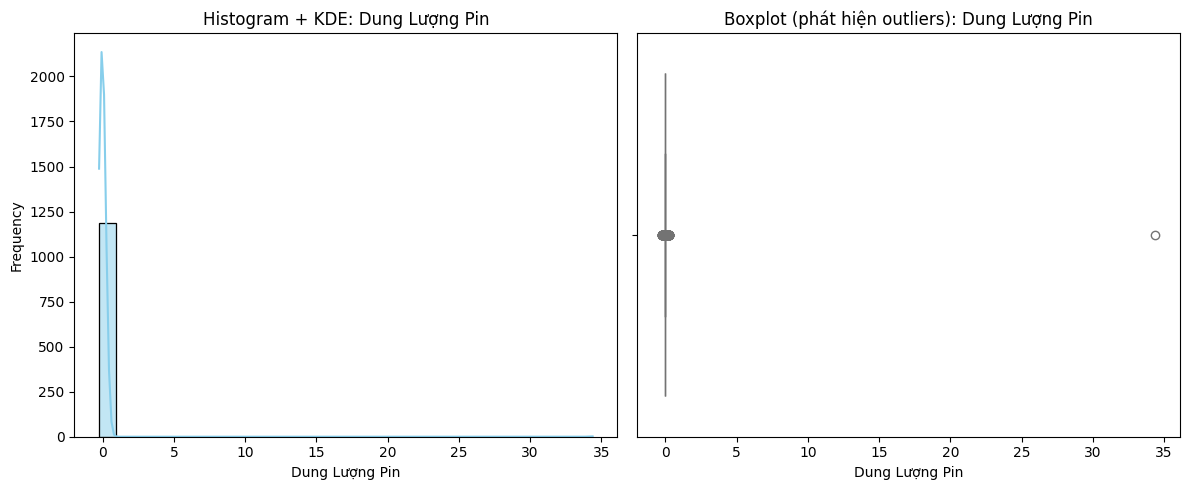

Số điểm nghi ngờ outlier theo Z-score (>3): 1




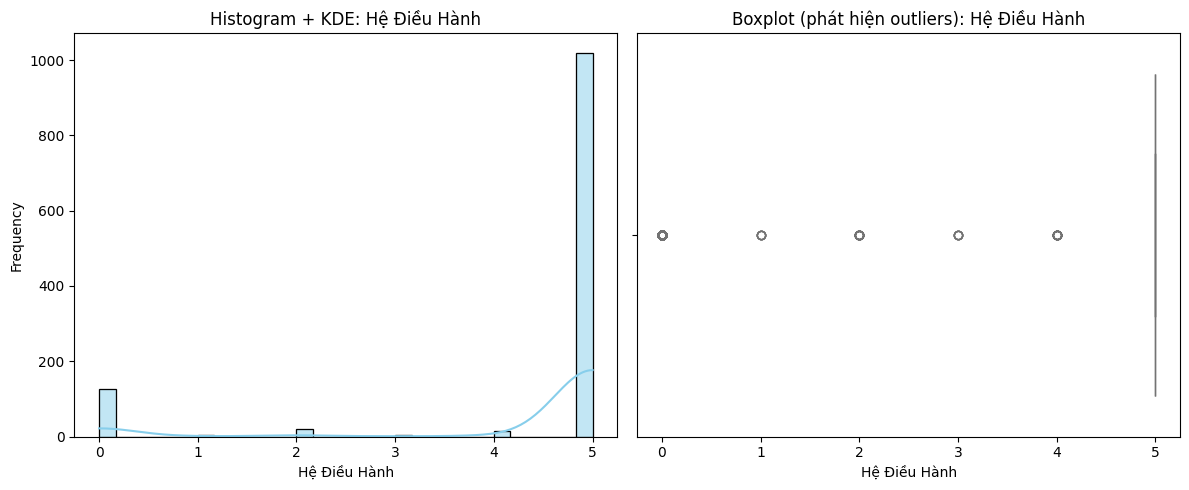

Số điểm nghi ngờ outlier theo Z-score (>3): 0




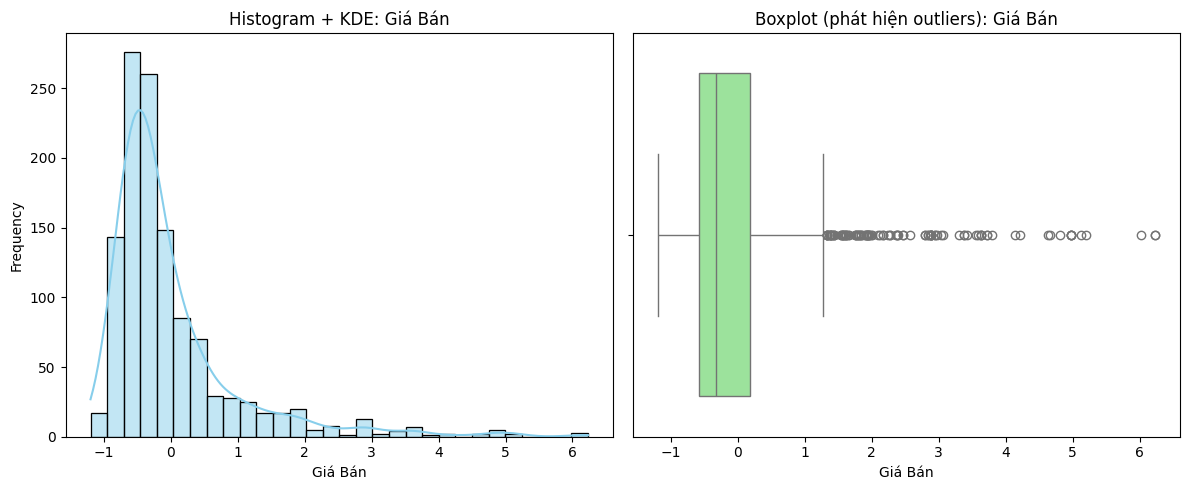

Số điểm nghi ngờ outlier theo Z-score (>3): 28




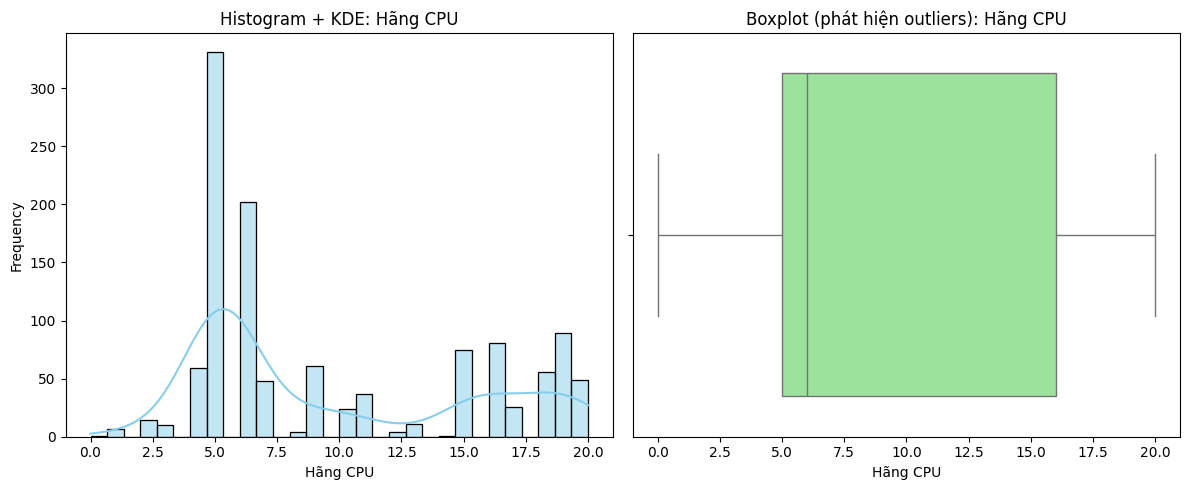

Số điểm nghi ngờ outlier theo Z-score (>3): 0




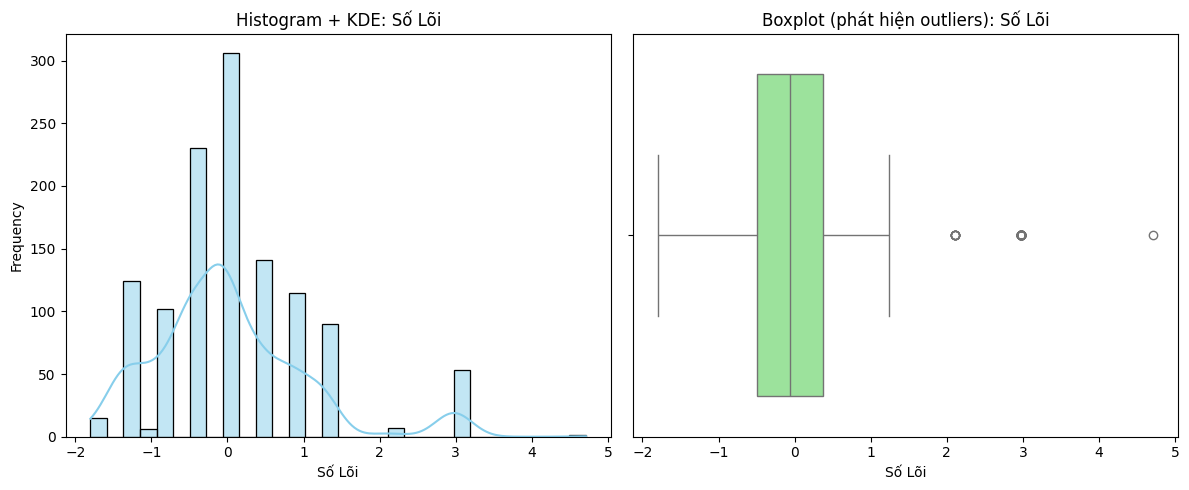

Số điểm nghi ngờ outlier theo Z-score (>3): 1




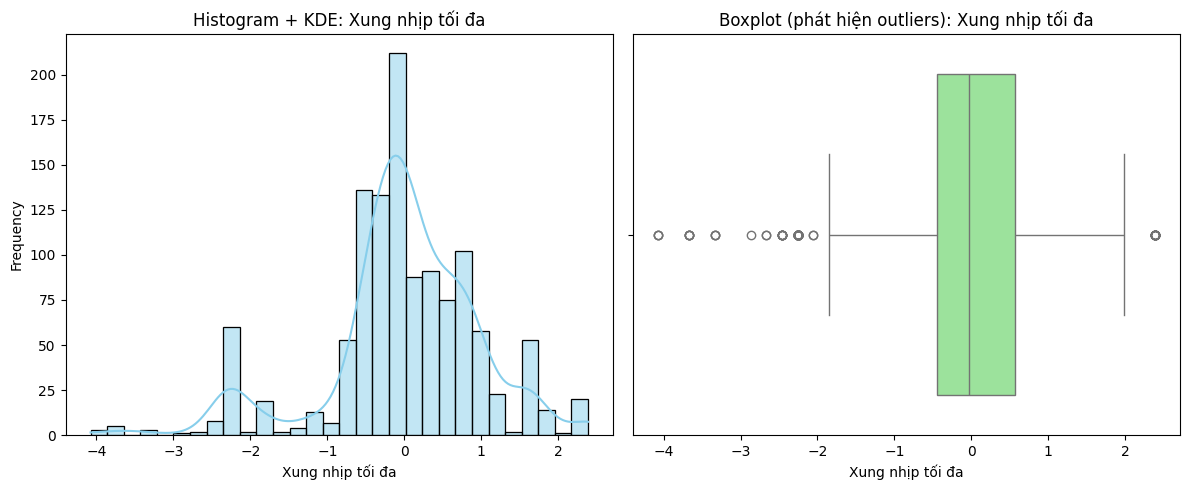

Số điểm nghi ngờ outlier theo Z-score (>3): 0




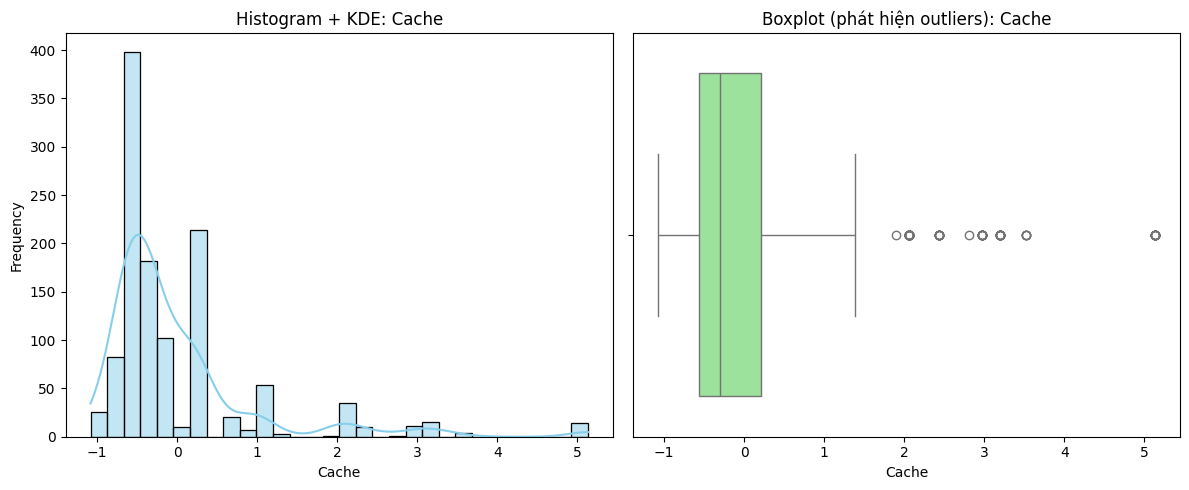

Số điểm nghi ngờ outlier theo Z-score (>3): 33




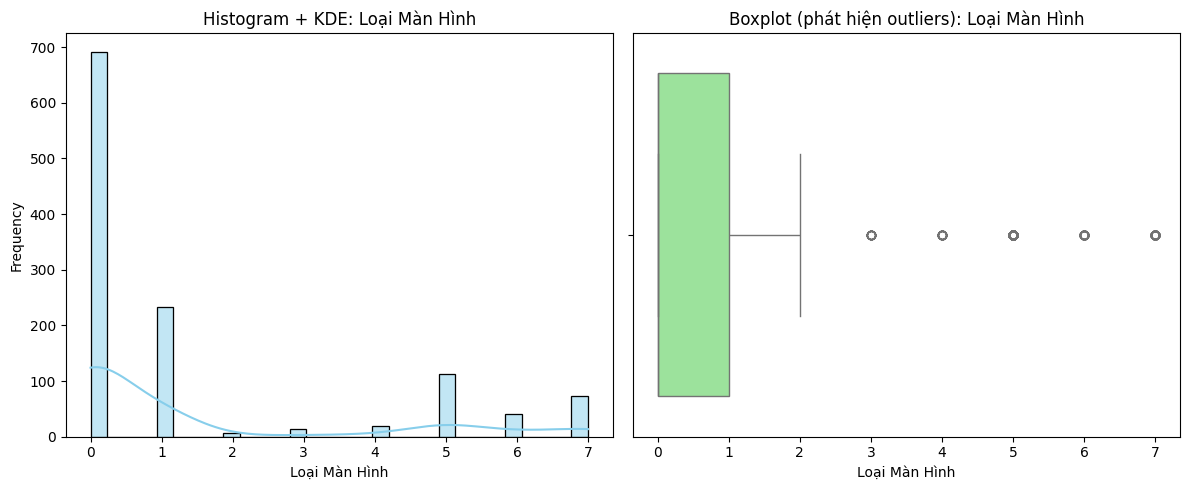

Số điểm nghi ngờ outlier theo Z-score (>3): 0




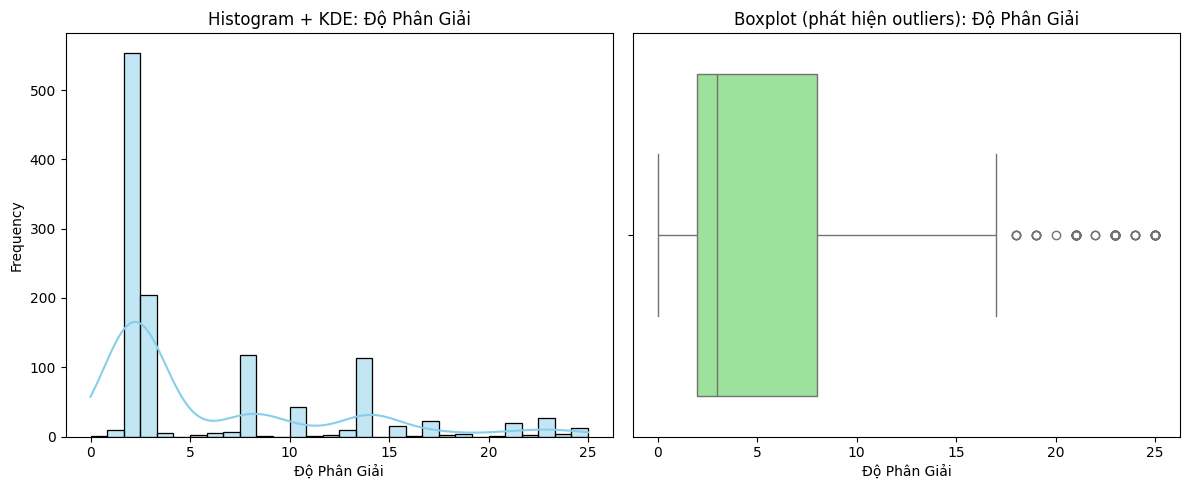

Số điểm nghi ngờ outlier theo Z-score (>3): 13




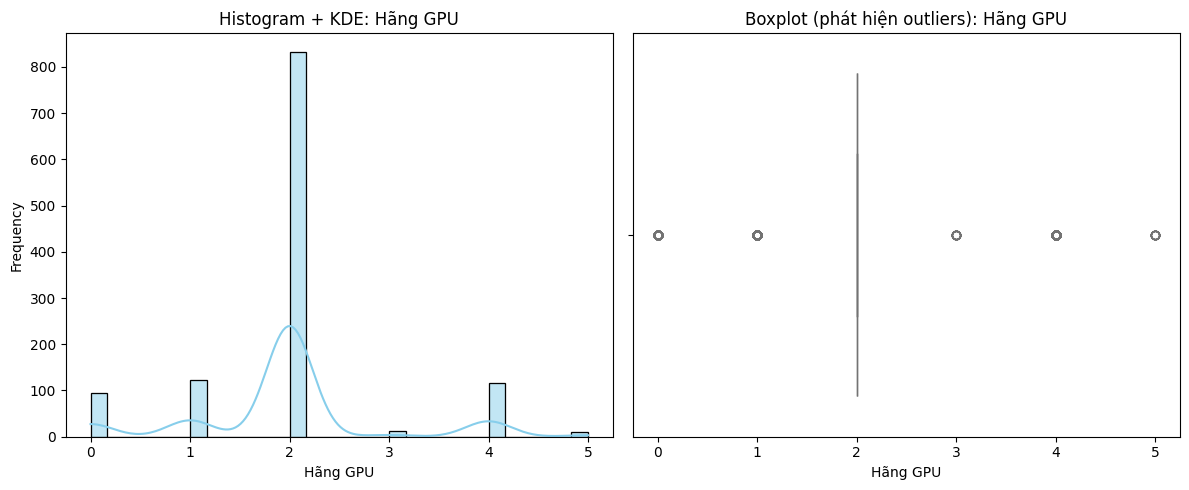

Số điểm nghi ngờ outlier theo Z-score (>3): 11




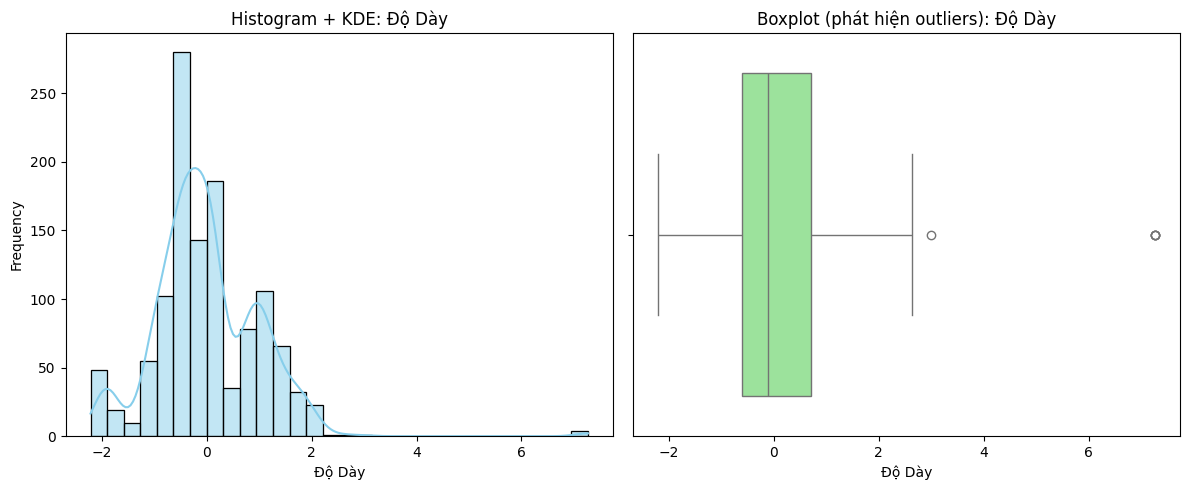

Số điểm nghi ngờ outlier theo Z-score (>3): 4




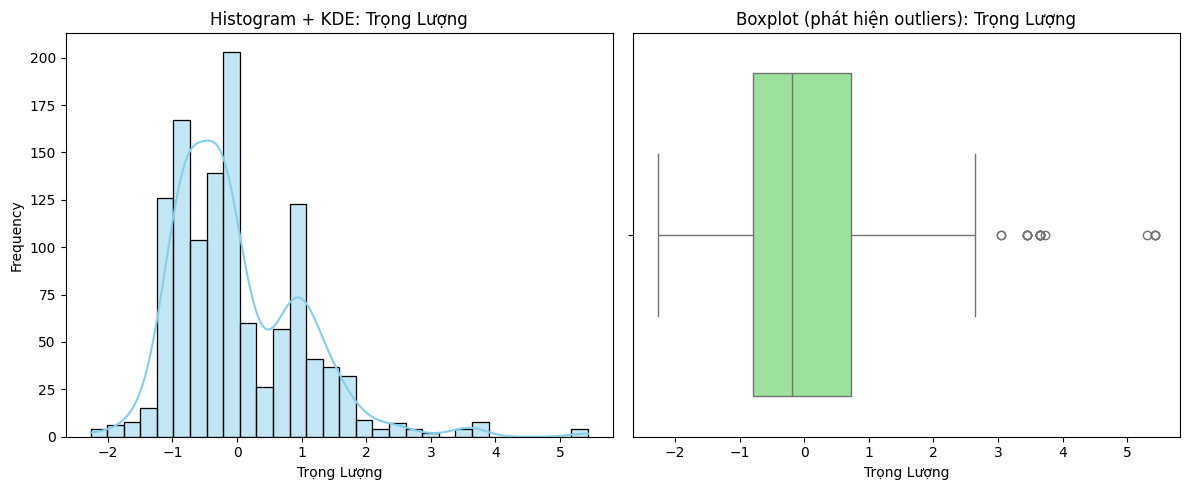

Số điểm nghi ngờ outlier theo Z-score (>3): 18




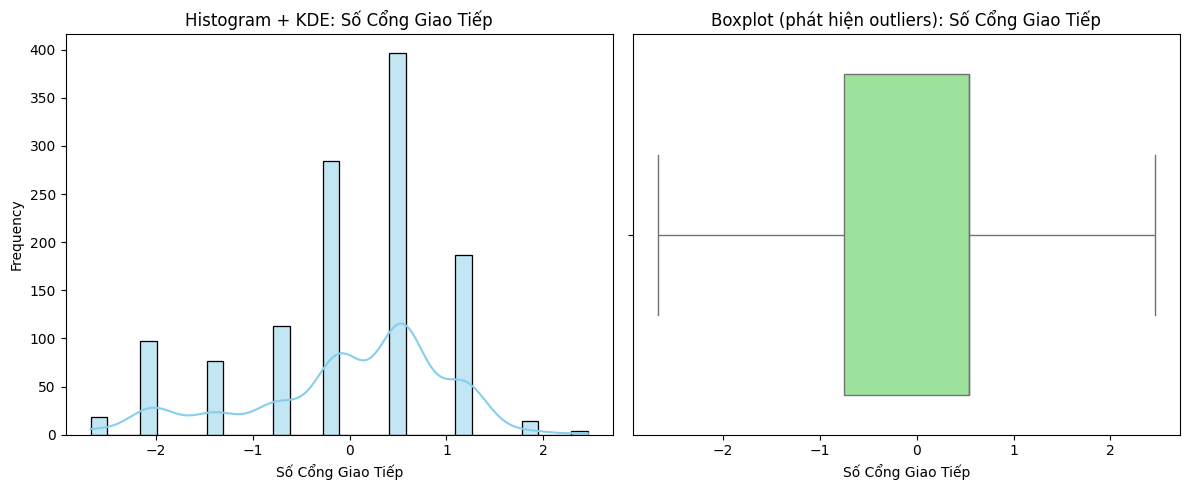

Số điểm nghi ngờ outlier theo Z-score (>3): 0




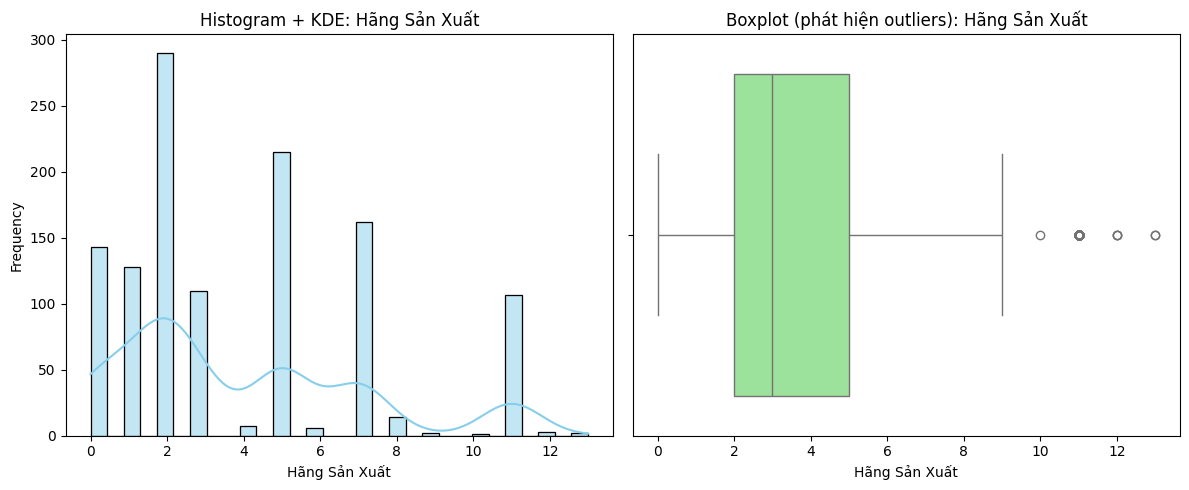

Số điểm nghi ngờ outlier theo Z-score (>3): 0




In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Lấy các cột số
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    # Histogram + KDE
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram + KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot để phát hiện outliers trực quan
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot (phát hiện outliers): {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Phát hiện outliers bằng Z-score
    z_scores = zscore(df[col].dropna())
    outliers_z = df[col].abs()[(z_scores > 3)]
    print(f"Số điểm nghi ngờ outlier theo Z-score (>3): {len(outliers_z)}")
    
    print("\n")


In [18]:
from scipy.stats import zscore
import numpy as np

# Xác định các cột số dùng trong cả train và test
numeric_cols = df.select_dtypes(include='number').columns

# Tính Z-score cho test_df
z_scores = np.abs(zscore(df[numeric_cols], nan_policy='omit'))

# Tạo mask với ngưỡng Z-score > 3
threshold = 3
rows_with_outliers = (z_scores > threshold).any(axis=1)

# Loại bỏ các dòng có outlier khỏi test_df
test_df_cleaned = df[~rows_with_outliers].copy()


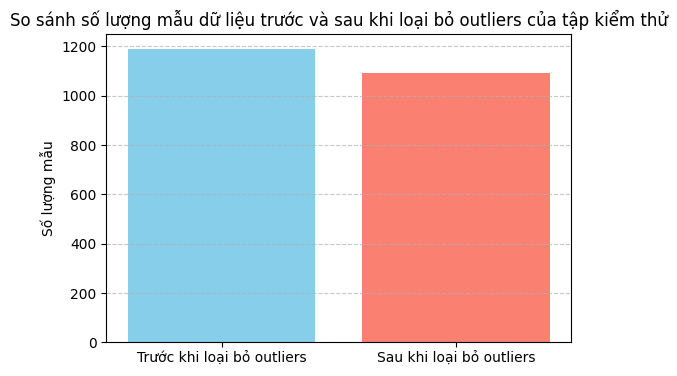

In [19]:
#Sô mẫu trước và sau loại bỏ outliers của data test
import matplotlib.pyplot as plt

# Số mẫu trước và sau khi loại bỏ outliers
counts = {
    'Trước khi loại bỏ outliers': len(df),
    'Sau khi loại bỏ outliers': len(test_df_cleaned)
}

plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon'])
plt.title('So sánh số lượng mẫu dữ liệu trước và sau khi loại bỏ outliers của tập kiểm thử')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Xuất dữ liệu đã mã hóa
df.to_csv("../clean_data_test/encoded_data.csv", index=False)